In [19]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot

In [20]:
data = read_csv_data("../data/processed_job_postings_large.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level"], "standardized_annual_salary")
data = clean_location(data, 2)
import random
random.seed(70)
random.shuffle(data)

train_data = data[:20000]
val_data = data[20000:30000]
test_data = data[30000:]

In [21]:
print(data[10])



(['IT Services and IT Consulting', 'FULL_TIME', 'CA', 'Entry level'], '54000.0')


In [22]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

7

In [23]:
from src.models.mlp import MLPDataset
# temp looks like this
# [[Tensor1, Tensor2, Tensor3, Tensor4], ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_one_hot = MLPDataset(temp, [float(target) for _, target in train_data])

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_one_hot = MLPDataset(temp, [float(target) for _, target in val_data])

In [24]:
from mlp import MLP, train_model
total_features = len(vocab_type) + len(vocab_sector) + len(vocab_state) + len(vocab_level)
model = MLP(input_size=total_features, hidden_size=64, output_size=1)  

Iter 50: Loss: 9118640128.0 Train mae 91166.24974369386, Validation mae 90259.13653398877
Iter 100: Loss: 16397412352.0 Train mae 91009.05735410645, Validation mae 90098.01659004575
Iter 150: Loss: 10339843072.0 Train mae 90805.02269645265, Validation mae 89902.5364568823
Iter 200: Loss: 10211846144.0 Train mae 90505.02473173097, Validation mae 89595.70885190183
Iter 250: Loss: 10865251328.0 Train mae 90110.1882951465, Validation mae 89197.83485672361
Iter 300: Loss: 9089785856.0 Train mae 89718.28934434082, Validation mae 88788.48778055173
Iter 350: Loss: 11740754944.0 Train mae 89278.097981792, Validation mae 88386.827227207
Iter 400: Loss: 10257541120.0 Train mae 88860.37445750002, Validation mae 87941.27884183102
Iter 450: Loss: 9361289216.0 Train mae 88291.15276438478, Validation mae 87346.41698086911
Iter 500: Loss: 11039485952.0 Train mae 87578.28107688477, Validation mae 86579.62513296872
Iter 550: Loss: 9942091776.0 Train mae 86970.79192698243, Validation mae 85930.42134878904

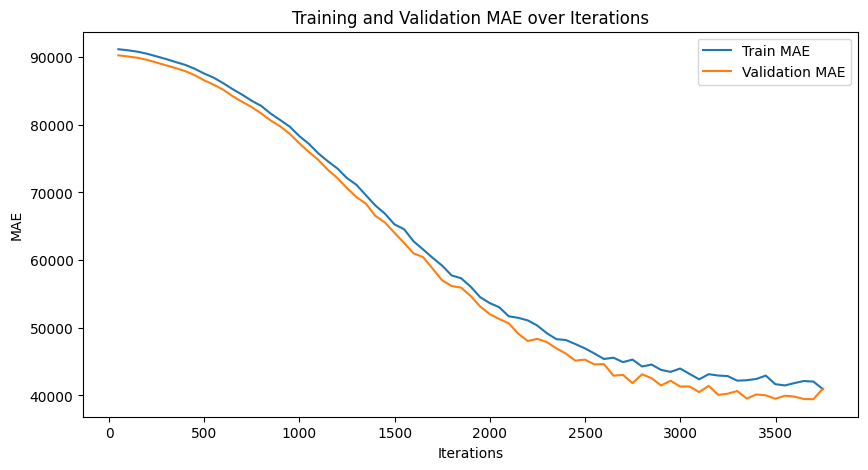

In [25]:
train_model(model, train_one_hot, val_one_hot, 0.01, batch_size=160, num_epochs=30)